In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Classification model evaluation metrics

## 1. Accuracy

In [6]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [8]:
np.mean(cross_val_score)

0.8248087431693989

In [18]:
print(f"Heart Disease using Random Forest Classifier has cross-validated accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease using Random Forest Classifier has cross-validated accuracy: 82.48%


## 2. Area under ROC Curve (Receiver Operating Characteristic Curve) / AUC (Area under Curve)

### ROC curve measures model's true positive rate (tpr) versus false positive rate (fpr)

### true positive: model gives 1 when truth is 1
### false positive: model gives 1 when truth is 0
### true negative: model gives 0 when truth is 0
### false negative: model gives 0 when truth is 1

In [10]:
# Create X_test....
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [23]:
# get only the positive values
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [28]:
y_probs_negative = y_probs[:, 0]
y_probs_negative[:10]

array([0.58, 0.09, 0.55, 0.75, 0.52, 0.09, 0.3 , 0.98, 0.14, 0.39])

In [29]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

## Create a function for plotting ROC Curve

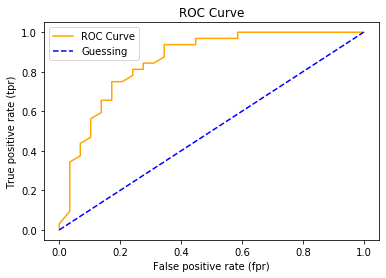

In [31]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve for given false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC Curve")
    # plot with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = "blue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [33]:
fpr[:10]

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828])

In [34]:
tpr[:10]

array([0.     , 0.03125, 0.09375, 0.125  , 0.1875 , 0.28125, 0.34375,
       0.375  , 0.4375 , 0.46875])

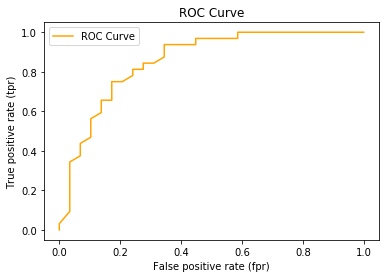

In [35]:
# ignore the baseline
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve for given false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC Curve")
    # plot with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color = "blue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [37]:
# calculate area under curve
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

## A perfect ROC Curve and AUC Score

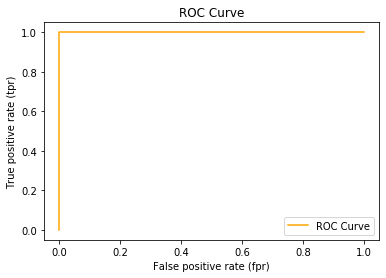

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [39]:
# Perfect auc curve
roc_auc_score(y_test, y_test)

1.0

## Confusion Matrix

### A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [12]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [13]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual labels"],
           colnames = ["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


## Install Package

In [14]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Matrix\Desktop\ml_course\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda





                                           Total:         163 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0




seaborn-0.10.1       | 163 KB    |            |   0% 
seaborn-0.10.1       | 163 KB    | 9          |  10% 
seaborn-0.10.1       | 163 KB    | #######8   |  78% 
seaborn-0.10.1       | 163 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


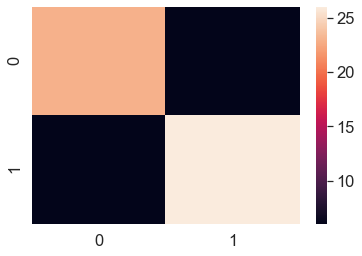

In [15]:
# Make confusion matrix visible using Seaborn Heat Map
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

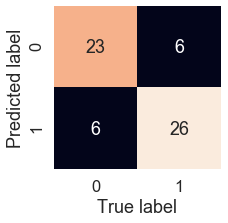

In [18]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot = True, #Annote the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(conf_mat)